Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.5177 - accuracy: 0.4427 - val_loss: 1.3187 - val_accuracy: 0.5195
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1498 - accuracy: 0.5913 - val_loss: 1.1058 - val_accuracy: 0.5995
Epoch 3/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0086 - accuracy: 0.6455 - val_loss: 1.0265 - val_accuracy: 0.6373
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9168 - accuracy: 0.6803 - val_loss: 0.9715 - val_accuracy: 0.6625
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8444 - accuracy: 0.7043 - val_loss: 0.9246 - val_accuracy: 0.6761
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7891 - accuracy: 0.7228 - val_loss: 0.8709 - val_accuracy: 0.6988
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7368 - accuracy: 0.7411 - val_loss: 0.8737 -

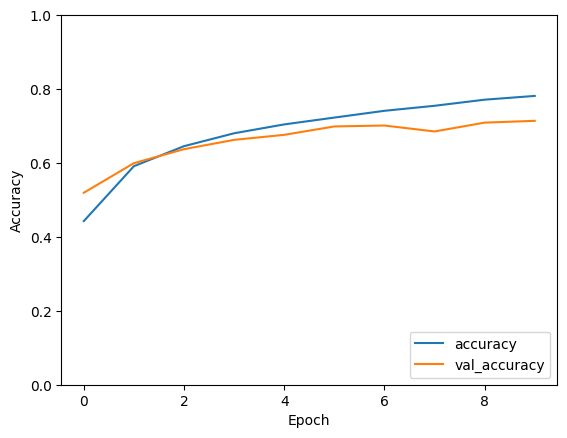

In [2]:
# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

# Define CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
